<a href="https://colab.research.google.com/github/MuhammadBasilKhan/Deep-learning-medical-classification/blob/main/brain_tumer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:

imagesize=256
Batchsize=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/chesse pics and brain tumer data",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)

Found 4478 files belonging to 44 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

In [ ]:
len(dataset)

140

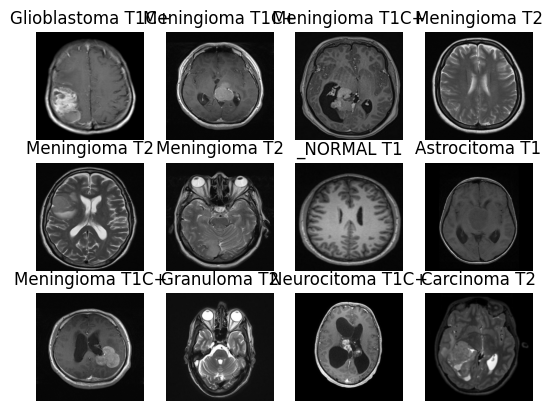

In [ ]:
for image_batch, label_batch in dataset.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
len(dataset)

140

In [ ]:
train_size=0.8
len(dataset)*train_size

112.0

In [ ]:
train_ds=dataset.take(112)
len(train_ds)

112

In [ ]:
test_ds=dataset.skip(112)
len(test_ds)

28

In [ ]:
val_size=0.1
len(dataset)*val_size

14.0

In [ ]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

22

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

112

In [ ]:
len(val_ds)

14

In [ ]:
len(test_ds)

14

In [ ]:
112+14+14

140

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(imagesize,imagesize),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(Batchsize,imagesize,imagesize,CHANNELS)
n_classes=44

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,
                  epochs=EPOCHS,
                  batch_size=Batchsize,verbose=1,
                  validation_data=val_ds)

Epoch 1/50
112/112 [==============================] - 425s 558ms/step - loss: 3.5317 - accuracy: 0.0843 - val_loss: 3.3833 - val_accuracy: 0.0915
Epoch 2/50
112/112 [==============================] - 7s 62ms/step - loss: 3.1594 - accuracy: 0.1546 - val_loss: 2.9528 - val_accuracy: 0.2232
Epoch 3/50
112/112 [==============================] - 7s 64ms/step - loss: 2.7949 - accuracy: 0.2411 - val_loss: 2.7613 - val_accuracy: 0.2500
Epoch 4/50
112/112 [==============================] - 7s 62ms/step - loss: 2.5228 - accuracy: 0.2949 - val_loss: 2.4016 - val_accuracy: 0.2991
Epoch 5/50
112/112 [==============================] - 7s 64ms/step - loss: 2.2502 - accuracy: 0.3580 - val_loss: 2.2920 - val_accuracy: 0.3504
Epoch 6/50
112/112 [==============================] - 7s 62ms/step - loss: 2.0505 - accuracy: 0.4043 - val_loss: 1.9869 - val_accuracy: 0.4375
Epoch 7/50
112/112 [==============================] - 7s 64ms/step - loss: 1.8891 - accuracy: 0.4537 - val_loss: 1.9051 - val_accuracy: 0.4

In [ ]:
model.evaluate(test_ds)

14/14 [==============================] - 29s 23ms/step - loss: 0.9653 - accuracy: 0.7197


[0.9652766585350037, 0.7197309136390686]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 112}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[3.5317187309265137,
 3.1594176292419434,
 2.794891834259033,
 2.522799015045166,
 2.250232219696045]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

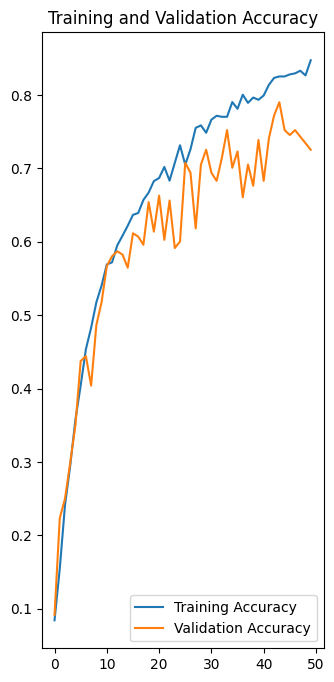

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



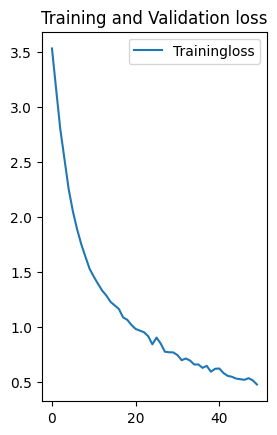

In [ ]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Trainingloss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
first image to predict
actual label: Papiloma T1C+
1/1 [==============================] - 0s 341ms/step
34
predicted label: Papiloma T1C+


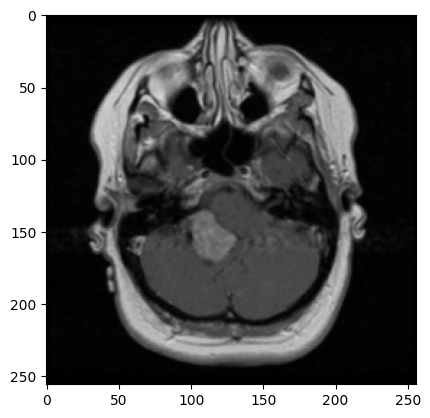

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  print(images_batch[0].numpy().astype('uint8'))
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print(np.argmax(batch_prediction[0]))
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 29ms/step


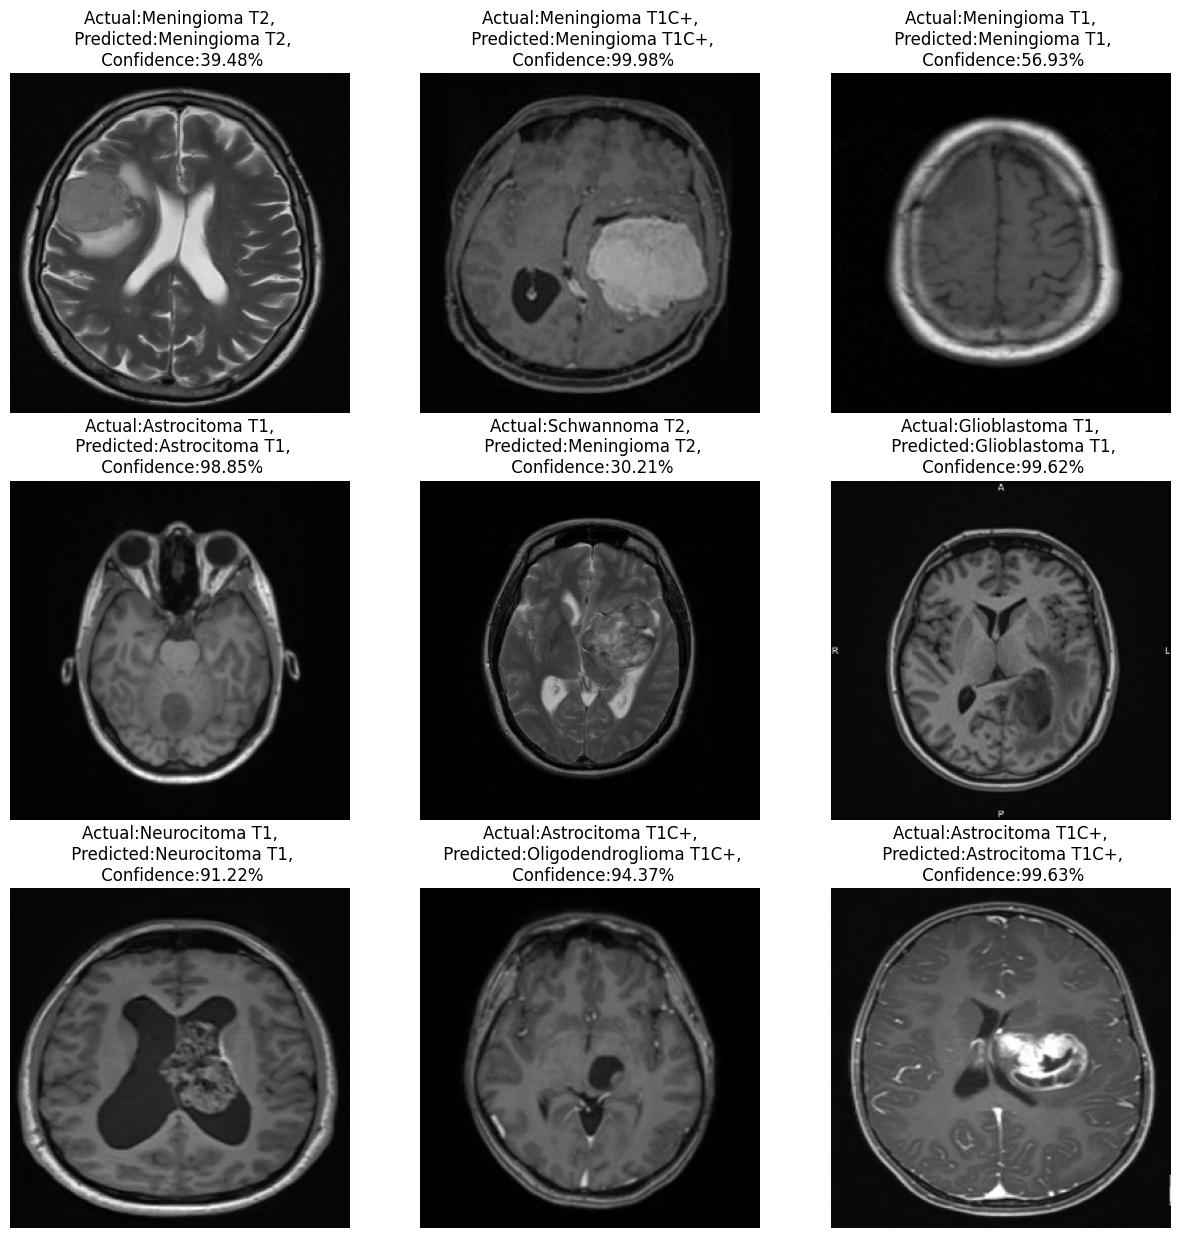

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    axis=plt.subplot(3,3,i+1)

    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:
model.save('/content/drive/MyDrive/your_model.h5')
